In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [302]:
def check_dataframe(df):
    print('-'*10,'Info of the Dataset','-'*20,'\n')
    display(df.info())
    
    print('-'*10,'Descriptionn of the Dataset','-'*20)
    display(df.describe())
    
    print('\n','-'*10,' Missing Values in the Dataset','-'*20)
    percent = pd.DataFrame(df.isnull().sum()/df.shape[0] * 100,columns=['Percent_Missing'])
    values  = pd.DataFrame(df.isnull().sum(),columns=['No_of_missing'])
    display(pd.concat([values,percent],axis = 1))
    
    
check_dataframe(df)

---------- Info of the Dataset -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  ac

None

---------- Descriptionn of the Dataset --------------------


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437



 ----------  Missing Values in the Dataset --------------------


,No_of_missing,Percent_Missing
date,0,0.000000
quarter,0,0.000000
department,0,0.000000
day,0,0.000000
team,0,0.000000
targeted_productivity,0,0.000000
smv,0,0.000000
wip,506,42.272348
over_time,0,0.000000
incentive,0,0.000000


In [303]:
# Dropping the data column 
df.drop(columns = 'date',inplace = True)

In [304]:
# Finding the variation in features

def features_check(df):
    print('The Coefficient of Variation')
    display( pd.DataFrame(df.std(numeric_only=True)/df.mean(numeric_only=True),columns=['Coefficient_of_variation']))
    print('\n','-'*10,' Categorical Features in the Dataset','-'*20)
    for i in df.select_dtypes(include='object').columns:
        
        display(df[i].value_counts())
features_check(df)

The Coefficient of Variation


,Coefficient_of_variation
team,0.538979
targeted_productivity,0.134165
smv,0.726537
wip,1.543475
over_time,0.733192
incentive,4.192108
idle_time,17.406840
idle_men,8.852891
no_of_style_change,2.845188
no_of_workers,0.641369



 ----------  Categorical Features in the Dataset --------------------


Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [305]:
# Treatment of Garbage Characters
df.department = df.department.replace('finishing ','finishing')

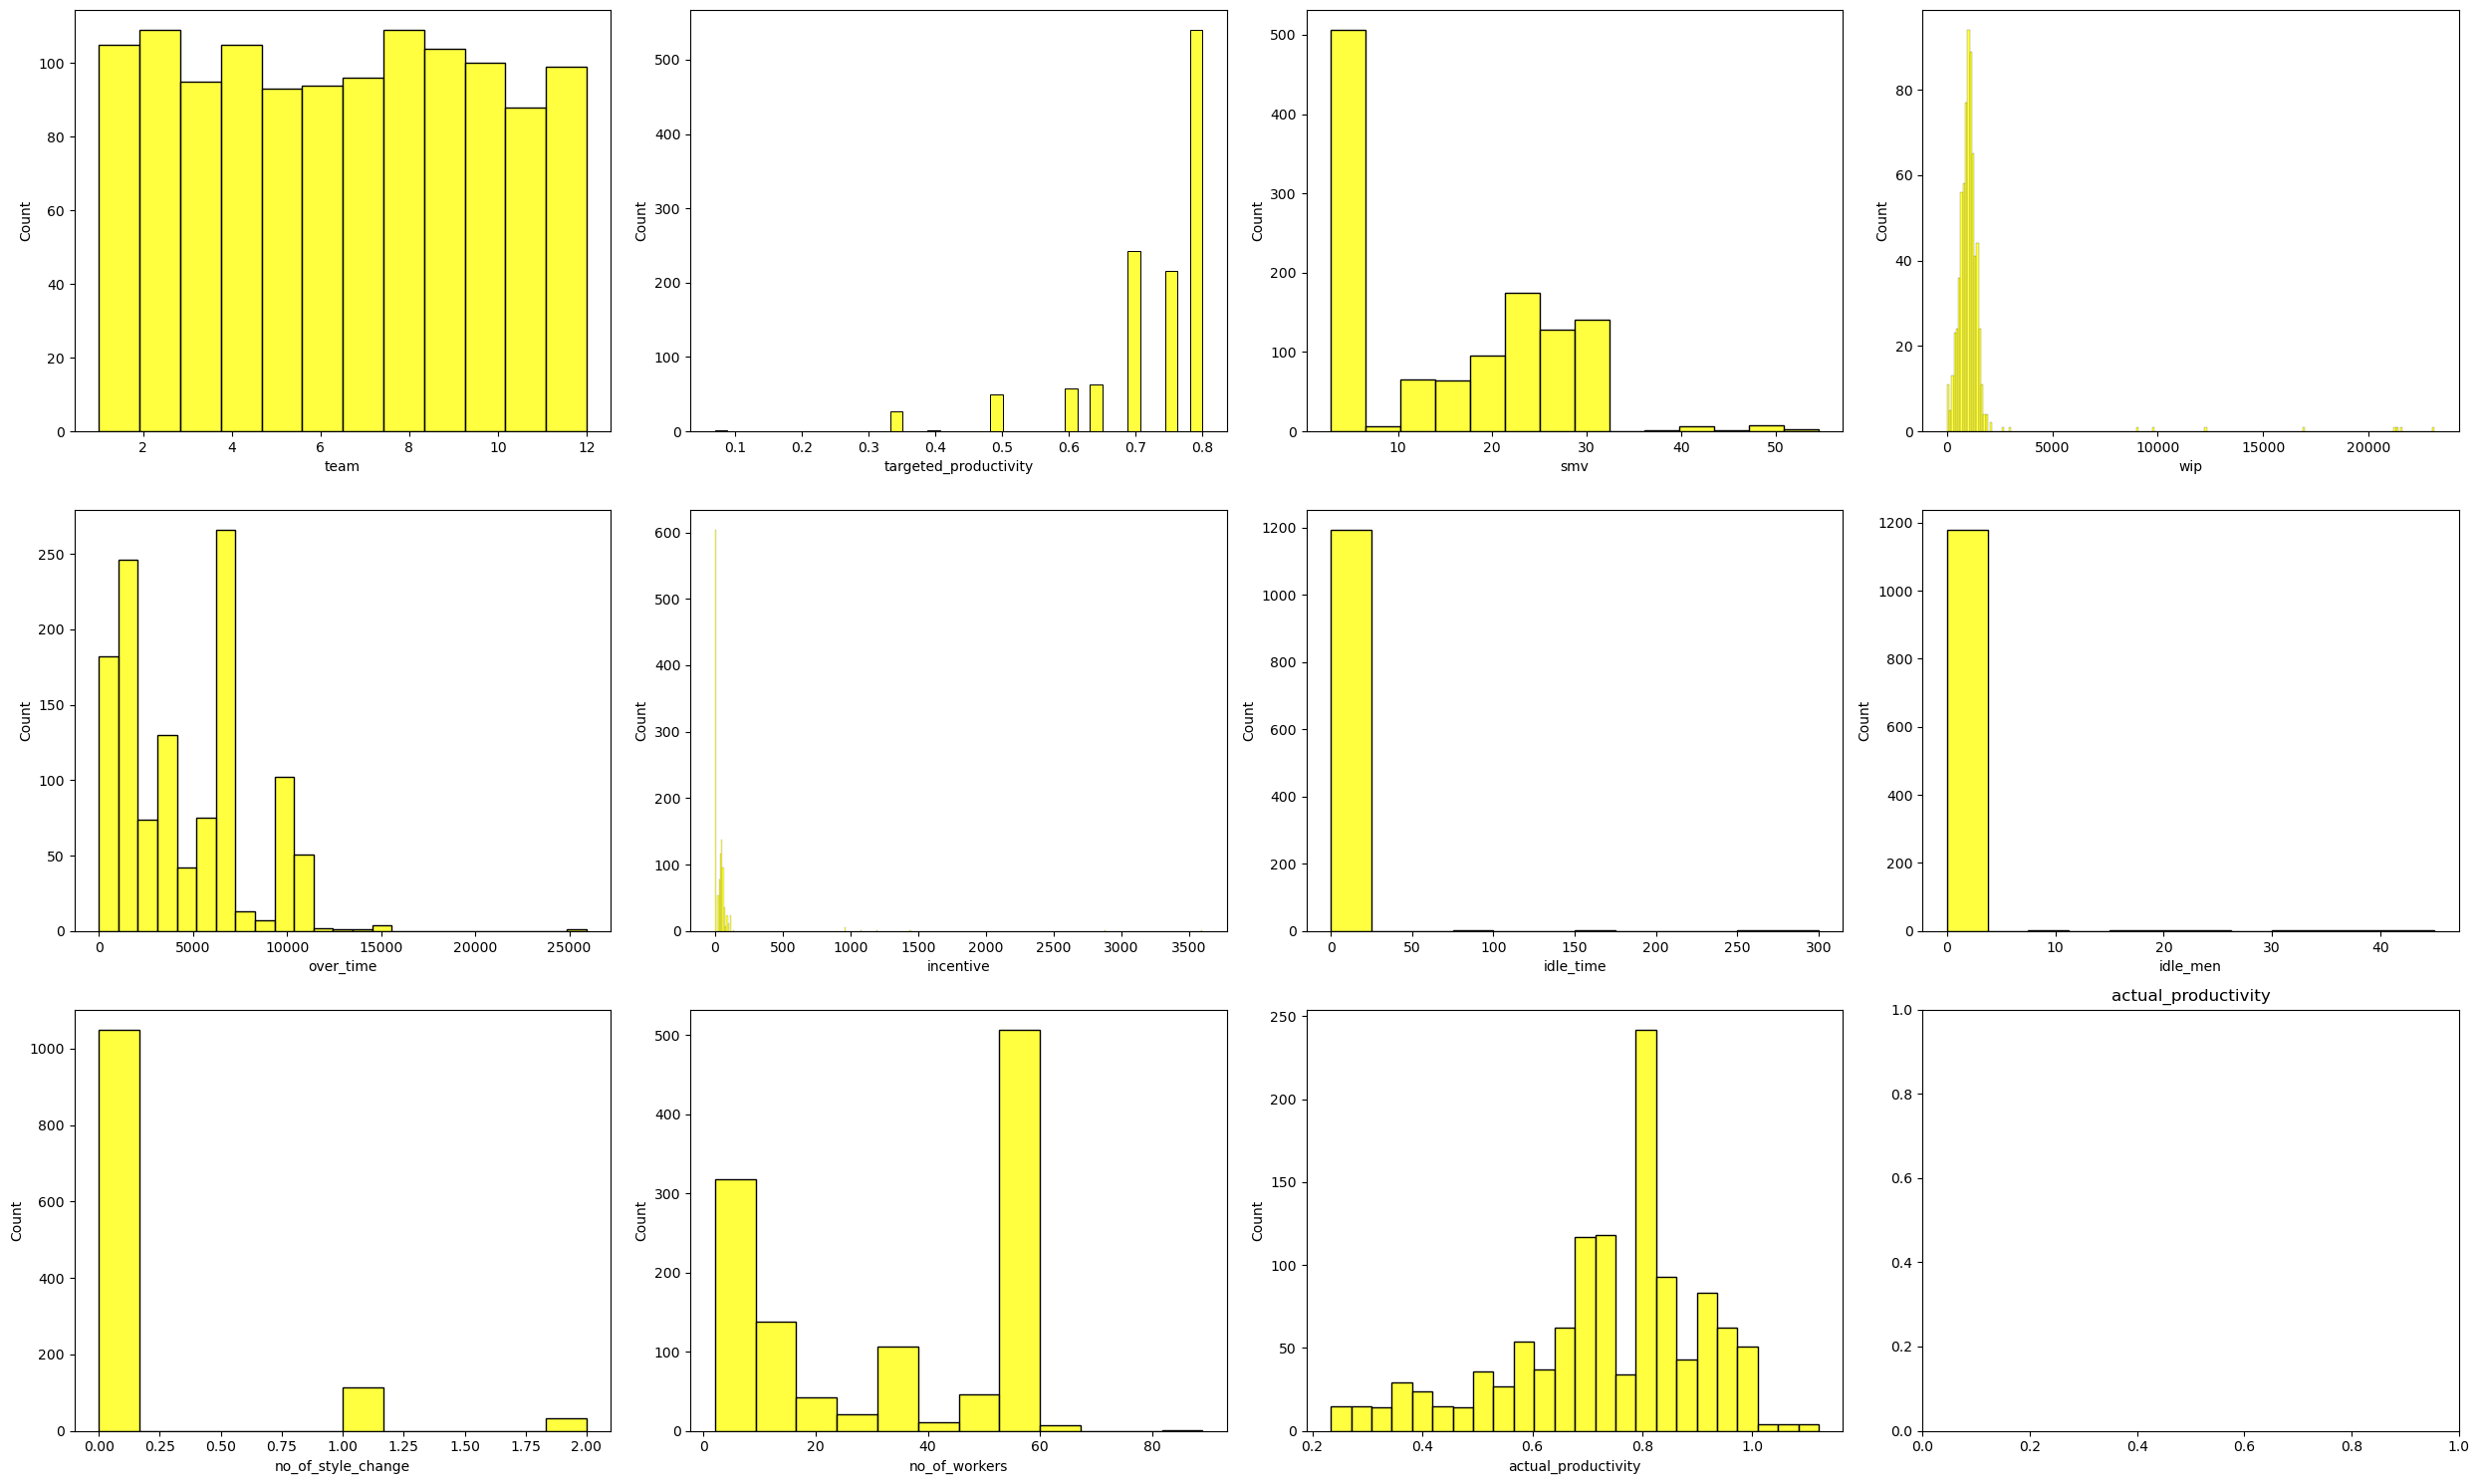

In [306]:
# Univariant Analysis

cols=list(df.select_dtypes(include=np.number).columns)

fig, ax= plt.subplots(3,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i],ax=subplot,color='yellow')
    plt.title(i)
plt.tight_layout()
plt.show()

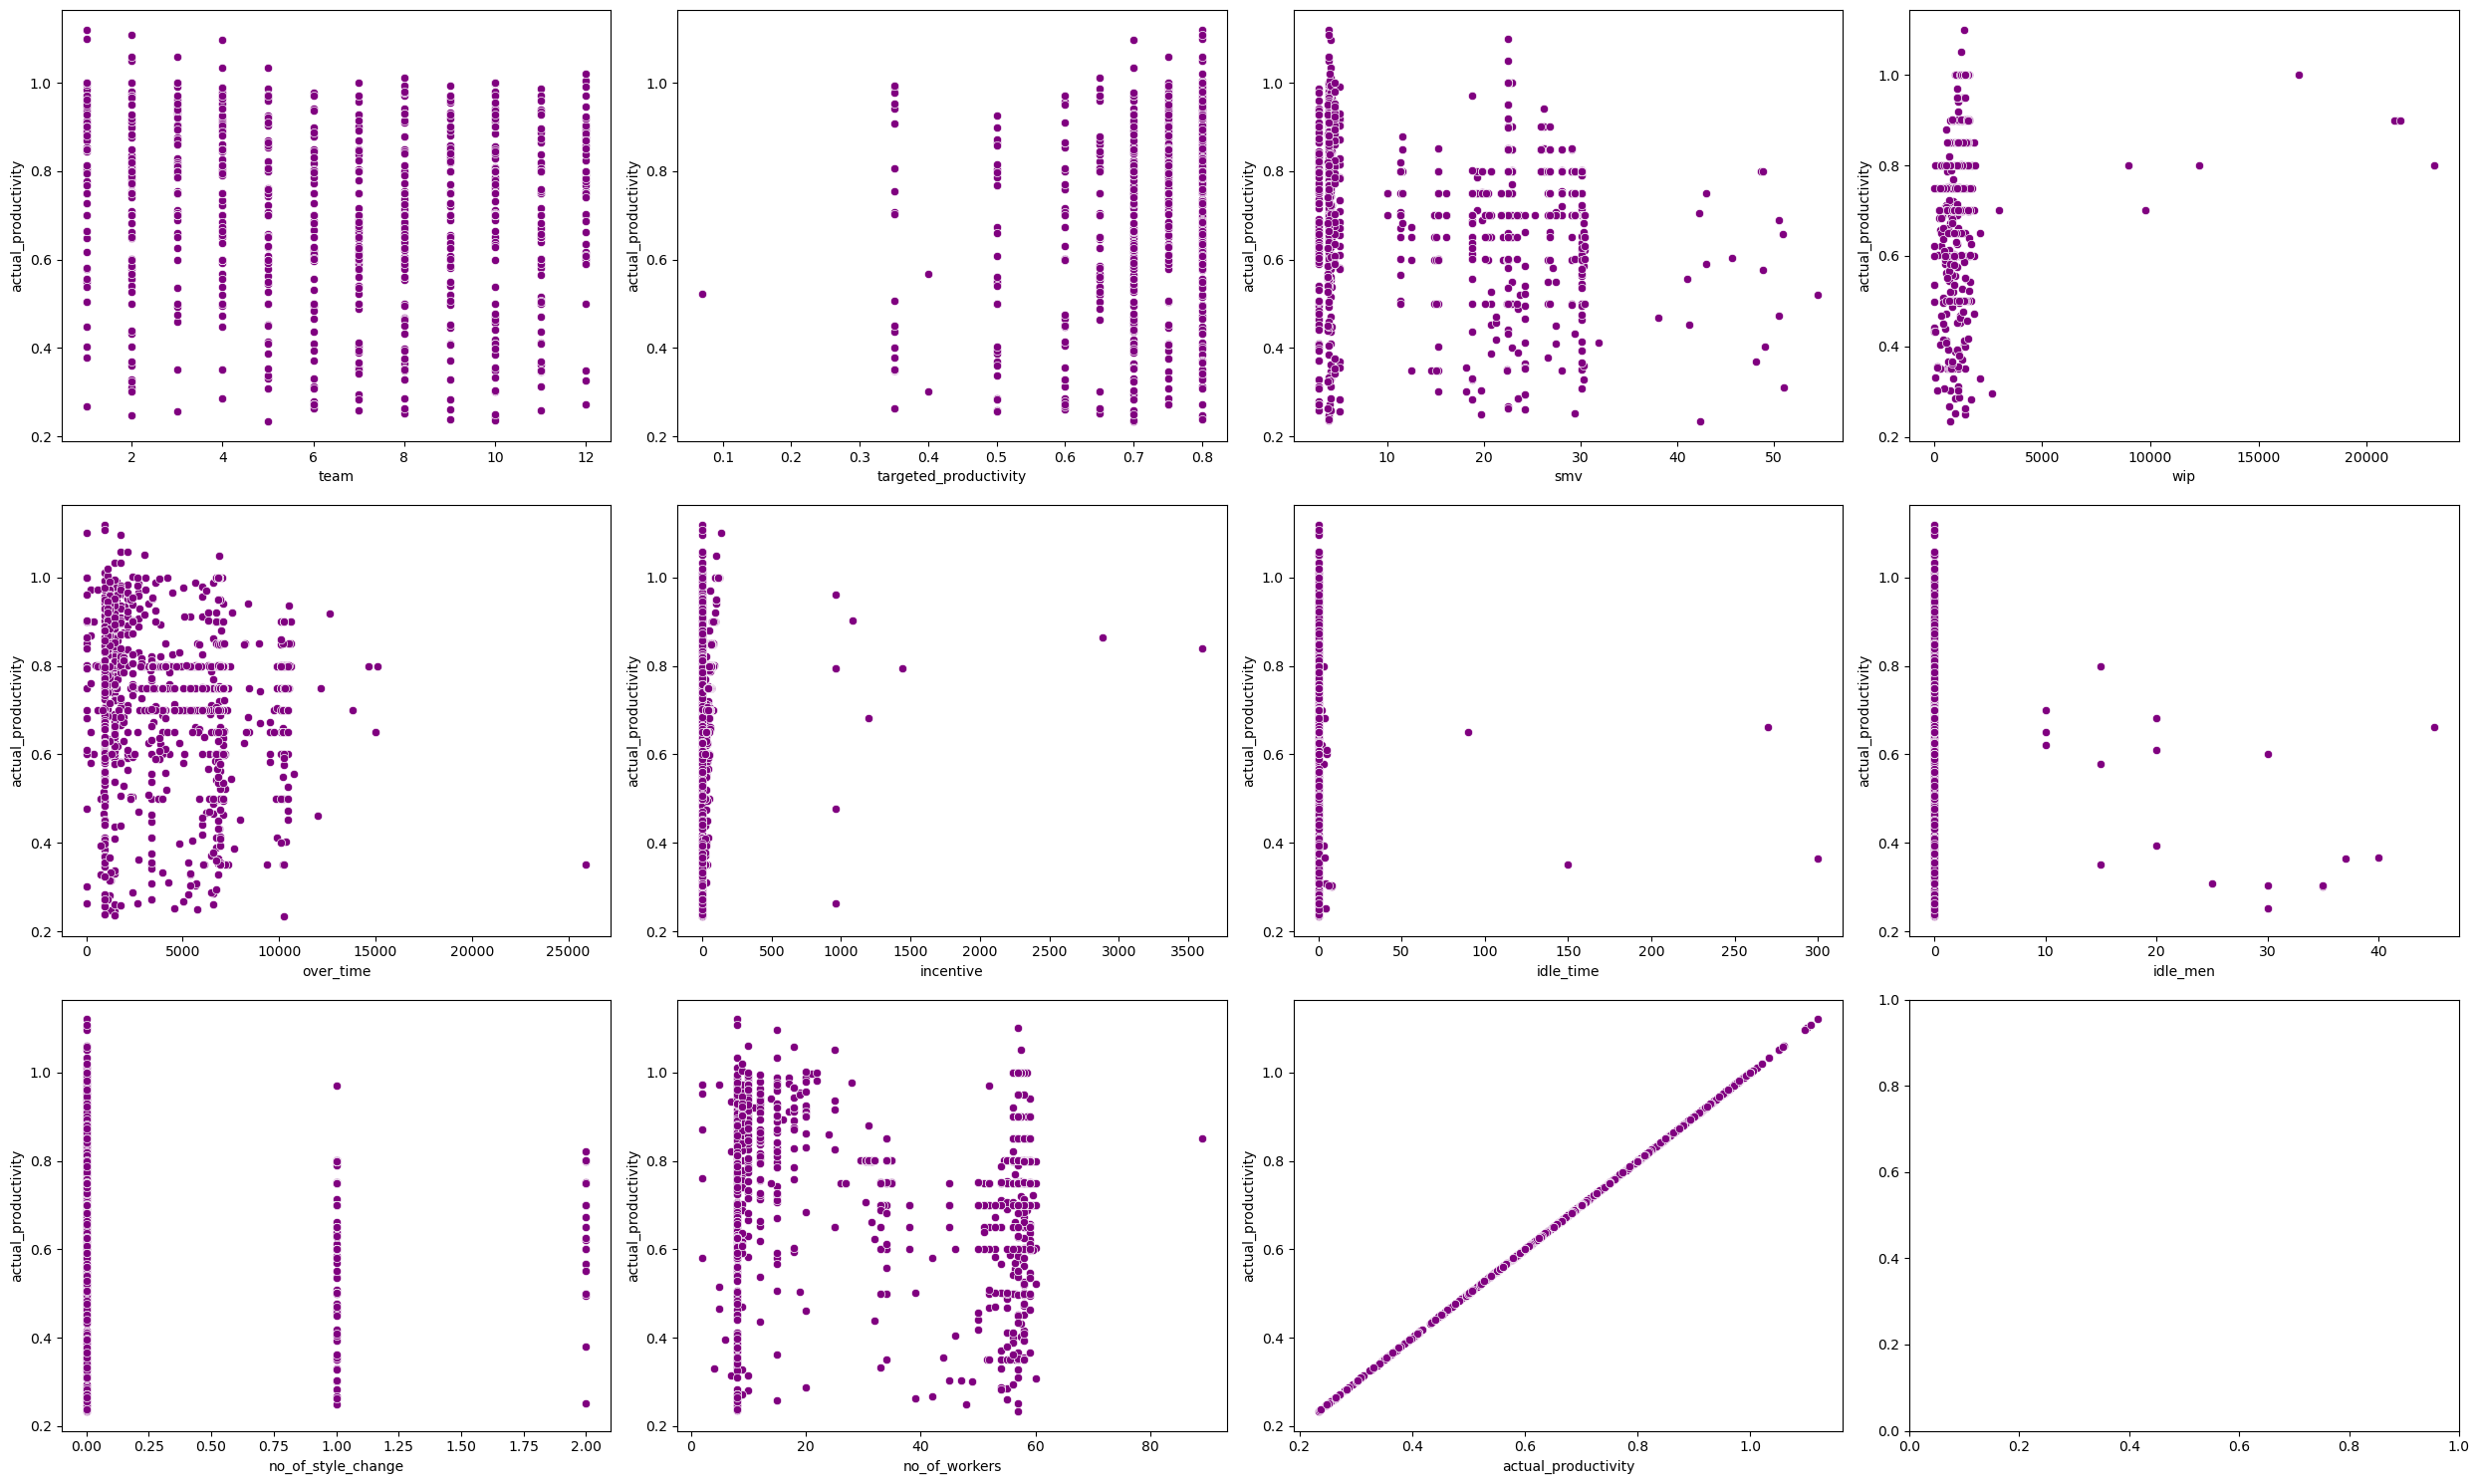

In [307]:
fig, ax= plt.subplots(3,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df[i],y=df.actual_productivity, ax=subplot,color='purple')
    #plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

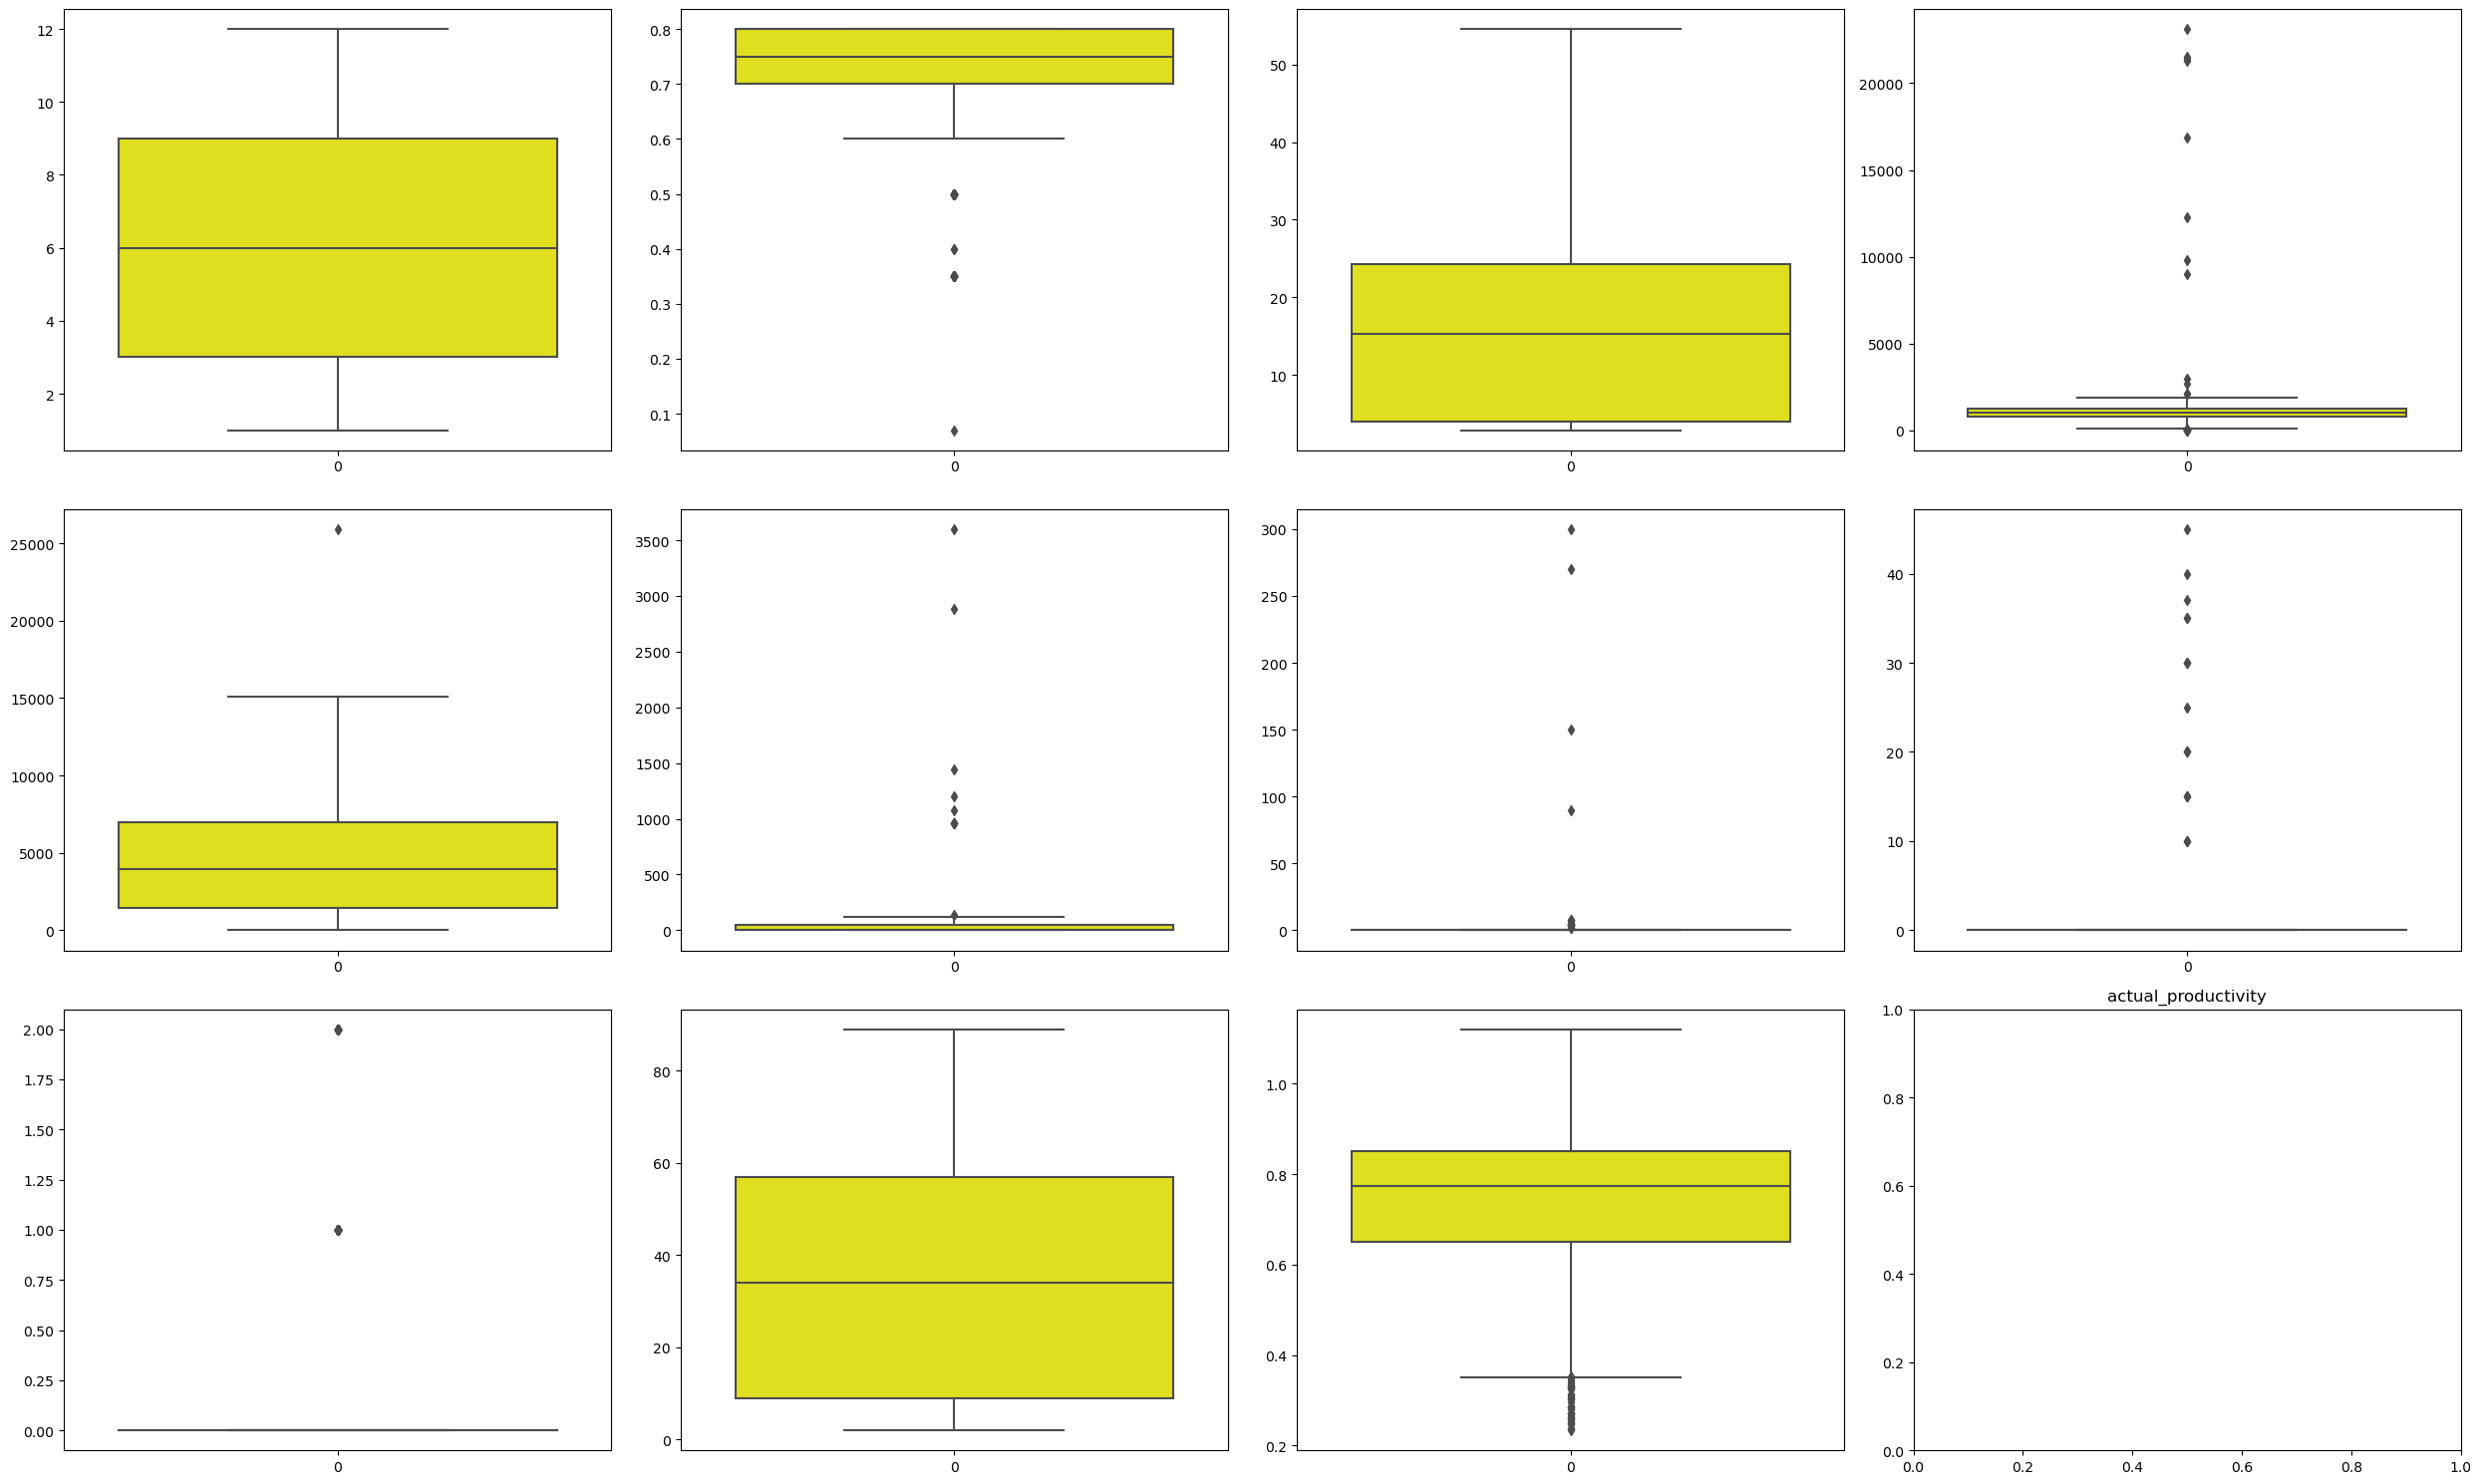

In [308]:
cols=list(df.select_dtypes(include=np.number).columns)

fig, ax= plt.subplots(3,4, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i],ax=subplot,color='yellow')
    plt.title(i)
plt.tight_layout()
plt.show()


<Axes: >

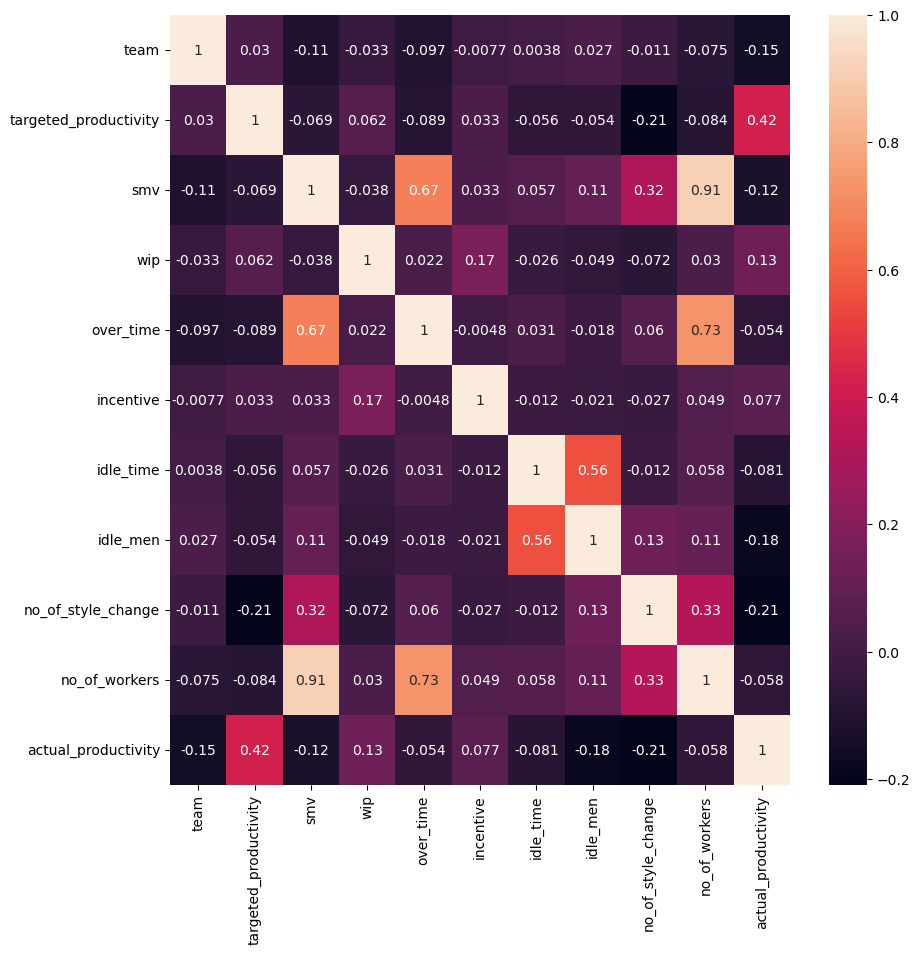

In [309]:
# COrrelation 
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(numeric_only=True),annot=True)

In [310]:
# Missing value Treatment

# we assume that the null values
df.wip.fillna(0,inplace = True)

In [311]:
# Outlier Treatment

q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)

iqr = q3 - q1

ul = q3 + (1.5 * iqr)

ll = q1 - (1.5 * iqr)

df[~(((df < (ll)) | (df > (ul))).any(axis=1))]

C:\Users\livin\AppData\Local\Temp\ipykernel_12560\3333973141.py:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\livin\AppData\Local\Temp\ipykernel_12560\3333973141.py:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\livin\AppData\Local\Temp\ipykernel_12560\3333973141.py:5: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\livin\AppData\Local\Temp\ipykernel_12560\3333973141.py:13: FutureWarning:

Automatic reindexing on DataFrame vs Series co

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [312]:
# Label Encoding day,quater columns to day numbers
df.day = df.day.map({'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday' : 5 ,'Friday' :6 ,'Saturday':7})


df.quarter =df.quarter.map({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})

In [314]:
# Encoding the department 
df = pd.get_dummies(df,drop_first=True)

# Building Models

In [315]:
import statsmodels.api as sma


In [316]:
X = df.drop(columns = 'actual_productivity')
y = df.actual_productivity

In [319]:
X.head()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,department_sweing
0,1,5,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,1,5,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0
2,1,5,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,1,5,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,1,5,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1


In [320]:
xc = sma.add_constant(X)
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.285
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     36.20
Date:                 Thu, 09 Nov 2023   Prob (F-statistic):           5.86e-77
Time:                         11:03:41   Log-Likelihood:                 592.33
No. Observations:                 1197   AIC:                            -1157.
Df Residuals:                     1183   BIC:                            -1085.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2504      0.038      6.540      0.000       0.175       0.326
quarter                   0.0030      0.004      0.829      0.407      -0.004       0.010
day                       0.0031      0.002      1.394      0.164      -0.001       0.008
team                     -0.0082      0.001     -6.228      0.000      -0.011      -0.006
targeted_productivity     0.7075      0.045     15.608      0.000       0.619       0.796
smv                      -0.0068      0.001     -6.891      0.000      -0.009      -0.005
wip                    4.978e-06   3.11e-06      1.602      0.109   -1.12e-06    1.11e-05
over_time             -5.096e-06   2.02e-06     -2.524      0.012   -9.06e-06   -1.13e-06
incentive              5.203e-05    2.7e-05      1.927      0.054   -9.34e-07       0.000
idle_time                 0.0004      0.000      1.022      0.307      -0.000       0.001
idle_men                 -0.0086      0.002     -5.328      0.000      -0.012      -0.005
no_of_style_change       -0.0497      0.012     -4.243      0.000      -0.073      -0.027
no_of_workers             0.0047      0.001      6.391      0.000       0.003       0.006
department_sweing        -0.0530      0.027     -1.951      0.051      -0.106       0.000
==============================================================================
Omnibus:                      137.670   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.219
Skew:                          -0.760   Prob(JB):                     3.08e-52
Kurtosis:                       4.564   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption 1 MultiCollinearity

In [321]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(xc,i)  for i in range(xc.shape[1]) ]
pd.DataFrame(vf,index = xc.columns,columns = ['vif'])

,vif
const,79.702444
quarter,1.081057
day,1.032746
team,1.135791
targeted_productivity,1.069650
smv,6.244990
wip,1.202343
over_time,2.482763
incentive,1.015652
idle_time,1.491485


In [322]:
xc = xc.drop(columns='no_of_workers')
vf = [vif(xc,i)  for i in range(xc.shape[1]) ]
pd.DataFrame(vf,index = xc.columns,columns = ['vif'])

,vif
const,77.476896
quarter,1.079654
day,1.032415
team,1.105510
targeted_productivity,1.069632
smv,4.966061
wip,1.198232
over_time,2.177684
incentive,1.012340
idle_time,1.491485


In [323]:
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.260
Model:                             OLS   Adj. R-squared:                  0.252
Method:                  Least Squares   F-statistic:                     34.65
Date:                 Thu, 09 Nov 2023   Prob (F-statistic):           3.10e-69
Time:                         11:07:44   Log-Likelihood:                 572.02
No. Observations:                 1197   AIC:                            -1118.
Df Residuals:                     1184   BIC:                            -1052.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2913      0.038      7.590      0.000       0.216       0.367
quarter                   0.0022      0.004      0.590      0.556      -0.005       0.010
day                       0.0029      0.002      1.259      0.208      -0.002       0.007
team                     -0.0096      0.001     -7.250      0.000      -0.012      -0.007
targeted_productivity     0.7063      0.046     15.326      0.000       0.616       0.797
smv                      -0.0039      0.001     -4.410      0.000      -0.006      -0.002
wip                    6.138e-06   3.15e-06      1.947      0.052   -4.76e-08    1.23e-05
over_time             -5.732e-07   1.92e-06     -0.298      0.766   -4.34e-06     3.2e-06
incentive              6.188e-05   2.74e-05      2.258      0.024    8.12e-06       0.000
idle_time                 0.0004      0.000      1.002      0.317      -0.000       0.001
idle_men                 -0.0081      0.002     -4.894      0.000      -0.011      -0.005
no_of_style_change       -0.0359      0.012     -3.071      0.002      -0.059      -0.013
department_sweing         0.0650      0.020      3.212      0.001       0.025       0.105
==============================================================================
Omnibus:                      128.156   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.934
Skew:                          -0.716   Prob(JB):                     1.06e-48
Kurtosis:                       4.542   Cond. No.                     7.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [357]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler,PowerTransformer

ss = StandardScaler()
df_new = pd.DataFrame(ss.fit_transform(df.select_dtypes(include='number')),columns=df.select_dtypes(include='number').columns)

In [329]:
X = df_new.drop(columns = 'actual_productivity')
y = df_new.actual_productivity

In [330]:
xc = sma.add_constant(X)
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.285
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     36.20
Date:                 Thu, 09 Nov 2023   Prob (F-statistic):           5.86e-77
Time:                         11:12:03   Log-Likelihood:                -1498.0
No. Observations:                 1197   AIC:                             3024.
Df Residuals:                     1183   BIC:                             3095.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.735e-18      0.025   7.05e-17      1.000      -0.048       0.048
quarter                   0.0212      0.026      0.829      0.407      -0.029       0.071
day                       0.0348      0.025      1.394      0.164      -0.014       0.084
team                     -0.1632      0.026     -6.228      0.000      -0.215      -0.112
targeted_productivity     0.3969      0.025     15.608      0.000       0.347       0.447
smv                      -0.4235      0.061     -6.891      0.000      -0.544      -0.303
wip                       0.0432      0.027      1.602      0.109      -0.010       0.096
over_time                -0.0978      0.039     -2.524      0.012      -0.174      -0.022
incentive                 0.0478      0.025      1.927      0.054      -0.001       0.096
idle_time                 0.0307      0.030      1.022      0.307      -0.028       0.090
idle_men                 -0.1620      0.030     -5.328      0.000      -0.222      -0.102
no_of_style_change       -0.1218      0.029     -4.243      0.000      -0.178      -0.065
no_of_workers             0.5997      0.094      6.391      0.000       0.416       0.784
department_sweing        -0.1501      0.077     -1.951      0.051      -0.301       0.001
==============================================================================
Omnibus:                      137.670   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.219
Skew:                          -0.760   Prob(JB):                     3.08e-52
Kurtosis:                       4.564   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
vf = [vif(xc,i)  for i in range(xc.shape[1]) ]
pd.DataFrame(vf,index = xc.columns,columns = ['vif'])

,vif
const,1.000000
quarter,1.081057
day,1.032746
team,1.135791
targeted_productivity,1.069650
smv,6.244990
wip,1.202343
over_time,2.482763
incentive,1.015652
idle_time,1.491485


In [344]:
# Using the Dataframe before Scaling
X = df.drop(columns = 'actual_productivity')
y = df.actual_productivity

In [345]:
xc = sma.add_constant(X)
model = sma.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.285
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     36.20
Date:                 Thu, 09 Nov 2023   Prob (F-statistic):           5.86e-77
Time:                         11:21:11   Log-Likelihood:                 592.33
No. Observations:                 1197   AIC:                            -1157.
Df Residuals:                     1183   BIC:                            -1085.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2504      0.038      6.540      0.000       0.175       0.326
quarter                   0.0030      0.004      0.829      0.407      -0.004       0.010
day                       0.0031      0.002      1.394      0.164      -0.001       0.008
team                     -0.0082      0.001     -6.228      0.000      -0.011      -0.006
targeted_productivity     0.7075      0.045     15.608      0.000       0.619       0.796
smv                      -0.0068      0.001     -6.891      0.000      -0.009      -0.005
wip                    4.978e-06   3.11e-06      1.602      0.109   -1.12e-06    1.11e-05
over_time             -5.096e-06   2.02e-06     -2.524      0.012   -9.06e-06   -1.13e-06
incentive              5.203e-05    2.7e-05      1.927      0.054   -9.34e-07       0.000
idle_time                 0.0004      0.000      1.022      0.307      -0.000       0.001
idle_men                 -0.0086      0.002     -5.328      0.000      -0.012      -0.005
no_of_style_change       -0.0497      0.012     -4.243      0.000      -0.073      -0.027
no_of_workers             0.0047      0.001      6.391      0.000       0.003       0.006
department_sweing        -0.0530      0.027     -1.951      0.051      -0.106       0.000
==============================================================================
Omnibus:                      137.670   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.219
Skew:                          -0.760   Prob(JB):                     3.08e-52
Kurtosis:                       4.564   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
### Assumption 2  - Normality of Residual

In [347]:
model.resid.skew()

-0.7611098509955411

<Axes: ylabel='Density'>

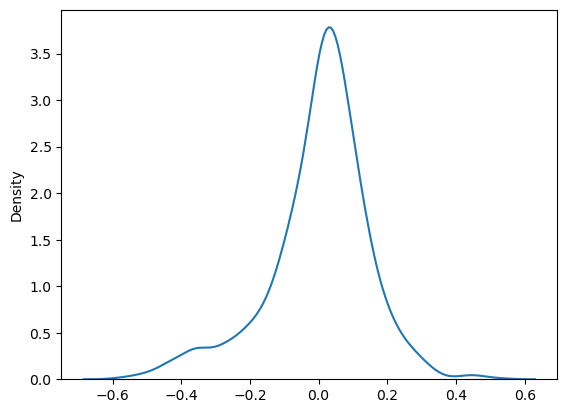

In [348]:
sns.kdeplot(model.resid)

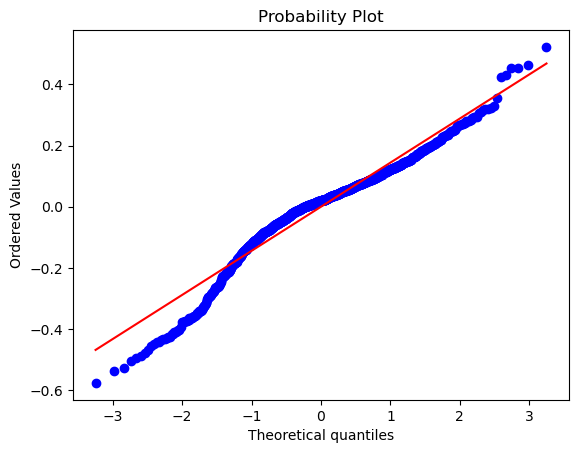

In [349]:
# qq plot

import scipy.stats as stats

stats.probplot(model.resid,plot = plt) # qq plot

# how the actual values

# red line tells whether the values are exactly normal
# middle values are normal
# edges are normal

plt.show()

In [350]:
stats.jarque_bera(model.resid)

SignificanceResult(statistic=237.21906590615353, pvalue=3.0798838419250433e-52)

In [341]:
#data is not normal

In [367]:
pr = PowerTransformer(method='box-cox',standardize= False)

lny = pr.fit_transform(df[['actual_productivity']])

In [368]:
xc = sma.add_constant(X)
model = sma.OLS(lny,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     35.86
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.76e-76
Time:                        11:28:11   Log-Likelihood:                 1082.6
No. Observations:                1197   AIC:                            -2137.
Df Residuals:                    1183   BIC:                            -2066.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5114      0.025    -20.117      0.000      -0.561      -0.462
quarter                   0.0033      0.002      1.371      0.171      -0.001       0.008
day                       0.0022      0.001      1.462      0.144      -0.001       0.005
team                     -0.0060      0.001     -6.792      0.000      -0.008      -0.004
targeted_productivity     0.4432      0.030     14.724      0.000       0.384       0.502
smv                      -0.0045      0.001     -6.974      0.000      -0.006      -0.003
wip                    4.108e-06   2.06e-06      1.992      0.047    6.16e-08    8.15e-06
over_time             -3.808e-06   1.34e-06     -2.840      0.005   -6.44e-06   -1.18e-06
incentive              3.455e-05   1.79e-05      1.928      0.054   -6.12e-07    6.97e-05
idle_time                 0.0002      0.000      0.652      0.515      -0.000       0.001
idle_men                 -0.0046      0.001     -4.270      0.000      -0.007      -0.002
no_of_style_change       -0.0383      0.008     -4.926      0.000      -0.054      -0.023
no_of_workers             0.0034      0.000      6.935      0.000       0.002       0.004
department_sweing        -0.0534      0.018     -2.962      0.003      -0.089      -0.018
==============================================================================
Omnibus:                       19.161   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.725
Skew:                          -0.187   Prob(JB):                     2.59e-06
Kurtosis:                       3.613   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
model.resid.skew()

-0.18726209376110145

In [370]:
stats.jarque_bera(model.resid)

SignificanceResult(statistic=25.72538789493611, pvalue=2.593002862517203e-06)

In [371]:
# DAta is not normal

### Assumption 3 - Homoscedacity

ho : the errors terms are homoscedatcity  
h1 : the errors are heteroscedacitiy

In [373]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y = model.resid,x=xc)

(1.2207388132140773, 0.007955492000942085, 'increasing')

In [374]:
# The variance is not Constant for the residuals

## Assumption 4: Autocorrelation of residuals

In [376]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

1.0608665414176754

In [377]:
# Autocorrelation is present

In [382]:
# Shuffling the rows to removing the autocorrelation
new_df = df.sample(frac = 1 , random_state = 4).reset_index(drop=True)
X_new = new_df.drop(columns = 'actual_productivity')
y_new = new_df.actual_productivity
xc_new = sma.add_constant(X_new)

model = sma.OLS(y_new,xc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     actual_productivity   R-squared:                       0.285
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     36.20
Date:                 Thu, 09 Nov 2023   Prob (F-statistic):           5.86e-77
Time:                         11:36:53   Log-Likelihood:                 592.33
No. Observations:                 1197   AIC:                            -1157.
Df Residuals:                     1183   BIC:                            -1085.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2504      0.038      6.540      0.000       0.175       0.326
quarter                   0.0030      0.004      0.829      0.407      -0.004       0.010
day                       0.0031      0.002      1.394      0.164      -0.001       0.008
team                     -0.0082      0.001     -6.228      0.000      -0.011      -0.006
targeted_productivity     0.7075      0.045     15.608      0.000       0.619       0.796
smv                      -0.0068      0.001     -6.891      0.000      -0.009      -0.005
wip                    4.978e-06   3.11e-06      1.602      0.109   -1.12e-06    1.11e-05
over_time             -5.096e-06   2.02e-06     -2.524      0.012   -9.06e-06   -1.13e-06
incentive              5.203e-05    2.7e-05      1.927      0.054   -9.34e-07       0.000
idle_time                 0.0004      0.000      1.022      0.307      -0.000       0.001
idle_men                 -0.0086      0.002     -5.328      0.000      -0.012      -0.005
no_of_style_change       -0.0497      0.012     -4.243      0.000      -0.073      -0.027
no_of_workers             0.0047      0.001      6.391      0.000       0.003       0.006
department_sweing        -0.0530      0.027     -1.951      0.051      -0.106       0.000
==============================================================================
Omnibus:                      137.670   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.219
Skew:                          -0.760   Prob(JB):                     3.08e-52
Kurtosis:                       4.564   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

2.0342277295781024

In [387]:
# Autocorrelation has been eliminated after shuffling the data

### Assumption 5- linearity test

In [383]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(1.0059649724732478, 0.47132647163010577)

In [384]:
# the model is linear

In [393]:
results = pd.DataFrame()

In [388]:
new_df = df.sample(frac = 1 , random_state = 4).reset_index(drop=True)
X_new = new_df.drop(columns = 'actual_productivity')
y_new = new_df.actual_productivity
xtrain , xtest, ytrain,ytest = train_test_split(X_new,y_new,test_size=.20,random_state=100)

In [392]:
from sklearn.linear_model import LinearRegression


# Linear regression basic model

lr = LinearRegression()

lr.fit(xtrain,ytrain)


y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr = [train_r2,test_r2,train_rmse,test_rmse]
res_lr

[0.3124447376895755,
 0.14094781964962522,
 0.14616253656489103,
 0.1543485498891524]

In [394]:
results['Full Model'] = res_lr

In [396]:
# features for forward elimination

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr_forward = sfs(estimator=lr, k_features = 'best',scoring ='r2',forward = True)
sfs_forward = lr_forward.fit(xtrain,ytrain)

features_forward = list(sfs_forward.k_feature_names_)

features_forward

['team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'department_sweing']

In [397]:
# Linear regression model using features from sfs backward

lr = LinearRegression()

lr.fit(xtrain[features_forward],ytrain)


y_pred_train = lr.predict(xtrain[features_forward])
y_pred_test = lr.predict(xtest[features_forward])

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_forward = [train_r2,test_r2,train_rmse,test_rmse]
res_lr_forward

[0.31179379470556146,
 0.13269267367463344,
 0.14623170989123827,
 0.15508839049175535]

In [398]:
results['Forward Selection'] = res_lr_forward

In [399]:
# features for backward elimination


lr_back = sfs(estimator=lr, k_features = 'best',scoring ='r2',forward = False)
sfs_back = lr_back.fit(xtrain,ytrain)

features_back = list(sfs_back.k_feature_names_)
features_back

['team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'department_sweing']

In [400]:
# Linear regression model using features from sfs backward

lr = LinearRegression()

lr.fit(xtrain[features_back],ytrain)


y_pred_train = lr.predict(xtrain[features_back])
y_pred_test = lr.predict(xtest[features_back])

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_back = [train_r2,test_r2,train_rmse,test_rmse]
res_lr_back

[0.31179379470556146,
 0.13269267367463344,
 0.14623170989123827,
 0.15508839049175535]

In [401]:
results['backward elimination'] = res_lr_back

In [404]:
results.index = ['R2 Train','R2 Test','RMSE Train','RMSE Test']

In [405]:
# RFE method
from sklearn.feature_selection import RFE

In [406]:
lr = LinearRegression()

rfe = RFE(estimator=lr)

rfe_model = rfe.fit(xtrain,ytrain)

In [407]:
rank_df = pd.DataFrame()

In [408]:
rank_df['Feature'] = X.columns
rank_df['Rank']  =rfe_model.ranking_

In [409]:
features_rank = rank_df[rank_df.Rank ==1].Feature

features_rank

2                      team
3     targeted_productivity
4                       smv
9                  idle_men
10       no_of_style_change
12        department_sweing
Name: Feature, dtype: object

In [410]:
# Linear regression model using features from rfe

lr = LinearRegression()

lr.fit(xtrain[features_rank],ytrain)


y_pred_train = lr.predict(xtrain[features_rank])
y_pred_test = lr.predict(xtest[features_rank])

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr_rfe = [train_r2,test_r2,train_rmse,test_rmse]
res_lr_rfe

[0.2843835615052982,
 0.09887471989482444,
 0.14911537336528038,
 0.1580830724624148]

In [411]:
results['rfe_Selection'] = res_lr_rfe

In [412]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.312445,0.140948,0.146163,0.154349
Forward Selection,0.311794,0.132693,0.146232,0.155088
backward elimination,0.311794,0.132693,0.146232,0.155088
rfe_Selection,0.284384,0.098875,0.149115,0.158083


### Kfold Cross Validation

In [414]:
from sklearn.model_selection import cross_val_score

In [415]:
scores = cross_val_score(lr,xtrain,ytrain , cv = 5 ,scoring = 'r2')

In [416]:
np.mean(scores)

0.2920274462129469


# Regularization

### Ridge  Method

In [417]:
from sklearn.linear_model import Ridge,Lasso

In [438]:
# GridSeachCV is used to find the alpha value in the hyperparameter

from sklearn.model_selection import GridSearchCV

param = {'alpha': [0.1,1.5,0.2,1,0.3,0.4,0.5,0.6,0.8,0.01,0.05]}

r = Ridge()

rcv = GridSearchCV(r,param,cv=3,scoring ='r2')

rcv.fit(xtrain,ytrain)
rcv.best_params_

{'alpha': 0.1}

In [439]:
ridge_model = Ridge(alpha = 0.1)


ridge_model.fit(xtrain,ytrain)


y_pred_train = ridge_model.predict(xtrain)
y_pred_test = ridge_model.predict(xtest)

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_ridge = [train_r2,test_r2,train_rmse,test_rmse]
res_ridge

[0.31242525141264643,
 0.14143898044697722,
 0.14616460777548335,
 0.1543044193941126]

In [440]:
results['Ridge Model'] = res_ridge

In [441]:
# Lasso  

param = {'alpha': [0.01,0.1,1.5,0.2,1,0.3,0.4,0.5,0.6,0.8]}

l = Lasso()

lcv = GridSearchCV(l,param,cv=3,scoring ='r2')

lcv.fit(xtrain,ytrain)

lcv.best_params_

{'alpha': 0.01}

In [442]:
# changing alha = 0.01
lasso_model = Lasso(alpha = 0.01)


lasso_model.fit(xtrain,ytrain)


y_pred_train = lasso_model.predict(xtrain)
y_pred_test = lasso_model.predict(xtest)

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lasso = [train_r2,test_r2,train_rmse,test_rmse]
res_lasso

[0.12873302418857668,
 0.022714661975026584,
 0.16453484736640267,
 0.16462791313735703]

In [443]:
results['Lasso Model'] = res_lasso

In [445]:
results.T

,R2 Train,R2 Test,RMSE Train,RMSE Test
Full Model,0.312445,0.140948,0.146163,0.154349
Forward Selection,0.311794,0.132693,0.146232,0.155088
backward elimination,0.311794,0.132693,0.146232,0.155088
rfe_Selection,0.284384,0.098875,0.149115,0.158083
Ridge Model,0.312425,0.141439,0.146165,0.154304
Lasso Model,0.128733,0.022715,0.164535,0.164628
